## Loading and Prepping the Data

In [12]:
import pandas as pd
import numpy as np

In [13]:
data=pd.read_csv('data/phonemeData.txt', sep='\t', header=None)

In [14]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,727,728,729,730,731,732,733,734,735,736
0,1,Hadza,hts,hts-TZA,Khoisan,800,Africa,-3.47684,34.79905,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Sandawe,sad,sad-TZA,Khoisan,40000,Africa,-5.28543,35.46569,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Qxu^,knw,knw-NAM,Khoisan,1760,Africa,-19.47014,18.35209,0,...,0,0,0,0,0,0,0,0,0,0
3,4,Qxu^,ktz,ktz-NAM,Khoisan,28600,Africa,-19.76648,20.09317,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Qxu^,ktz,ktz-NAM,Khoisan,28600,Africa,-19.76648,20.09317,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
#Rename the columns cleanly
newColumns = data.columns.tolist()

newColumns[0] = "Language Number"
newColumns[1] = "Name"
newColumns[2] = "ISO Code"
newColumns[3] = "ISO A3 Code"
newColumns[4] = "Language Classification"
newColumns[5] = "Speaking Pop Size"
newColumns[6] = "Geographic Region"
newColumns[7] = "Latitude"
newColumns[8] = "Longitude"
for i in range(728):
    startPhonemeIndex = 9
    newColumns[startPhonemeIndex + i] = "Phoneme " + str(i)

#newColumns

In [16]:
data.columns = newColumns
data.head()

,Language Number,Name,ISO Code,ISO A3 Code,Language Classification,Speaking Pop Size,Geographic Region,Latitude,Longitude,Phoneme 0,...,Phoneme 718,Phoneme 719,Phoneme 720,Phoneme 721,Phoneme 722,Phoneme 723,Phoneme 724,Phoneme 725,Phoneme 726,Phoneme 727
0,1,Hadza,hts,hts-TZA,Khoisan,800,Africa,-3.47684,34.79905,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Sandawe,sad,sad-TZA,Khoisan,40000,Africa,-5.28543,35.46569,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Qxu^,knw,knw-NAM,Khoisan,1760,Africa,-19.47014,18.35209,0,...,0,0,0,0,0,0,0,0,0,0
3,4,Qxu^,ktz,ktz-NAM,Khoisan,28600,Africa,-19.76648,20.09317,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Qxu^,ktz,ktz-NAM,Khoisan,28600,Africa,-19.76648,20.09317,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
#Remove duplicates
data = data.drop_duplicates(keep = False, subset=data.columns.difference(['Language Number']))

In [18]:
#About 10 rows were duplicates
data.shape

(2072, 737)

Notes: https://www.ethnologue.com
is where you can paste in the ISO code to see that it's a real language, the "Name" column that is provided might not be super accurate

## Similarity Metrics

### Hamming Distance

In [19]:
### Hamming distance
def hamming_distance(bin_list1, bin_list2):
    if len(bin_list1) != len(bin_list2):
        raise ValueError("Binary lists must have the same length")

    distance = 0
    for i in range(len(bin_list1)):
        if bin_list1[i] != bin_list2[i]:
            distance += 1

    return distance

In [20]:
bukaRow = data.loc[data['Name'] == "Buka"]
bukaRow = bukaRow.iloc[:, 9:]
# #A list of the phoneme values
bukaRowList = list(bukaRow.values)

hammingDistanceMapToBukaRoot = {}
# bukaRowList

In [21]:
### Calculate Hamming distance for all
#Map the distances to language
for index, row in data.iterrows():
    #We actually want to include the base root in this map because it'll have 
    #perfect score and be our first value (root)

    languageName = row['Name']
    languagePhonemes = row.iloc[9:]
    # print(list(languagePhonemes.values))
    languagePhonemesList = list(languagePhonemes.values)
    hammingDistance = hamming_distance(bukaRowList[0], languagePhonemesList)
    #print(f"Hamming Distance between lists: {hammingDistance}")

    hammingDistanceMapToBukaRoot[languageName] = hammingDistance


In [22]:
treeData = data

# Now let's find the majority value for each Language Classification
def majority_value(group):
    phoneme_cols = [col for col in group.columns if col.startswith('Phoneme')]
    majority_row = {}
    for col in phoneme_cols:
        value_counts = group[col].value_counts()
        #print(value_counts)
        # Get the value with the highest count
        majority_value = value_counts.idxmax()
        #print(majority_value)
        # Store the majority value for the column
        majority_row[col] = majority_value
    return pd.Series(majority_row)

# Group by Language Classification and apply the majority_value function
groupedTreeData = treeData.groupby('Language Classification').apply(majority_value).reset_index()

print(groupedTreeData)

    Language Classification  Phoneme 0  Phoneme 1  Phoneme 2  Phoneme 3  \
0              Afro-Asiatic          0          0          0          0   
1                Alacalufan          0          0          0          0   
2                     Algic          0          0          0          0   
3                    Altaic          0          0          0          0   
4                Andamanese          0          0          0          0   
..                      ...        ...        ...        ...        ...   
97                Yeniseian          0          0          0          0   
98                 Yukaghir          0          0          0          0   
99                     Yuki          0          0          0          0   
100                Zamucoan          0          0          0          0   
101                Zaparoan          0          0          0          0   

     Phoneme 4  Phoneme 5  Phoneme 6  Phoneme 7  Phoneme 8  ...  Phoneme 718  \
0            0     

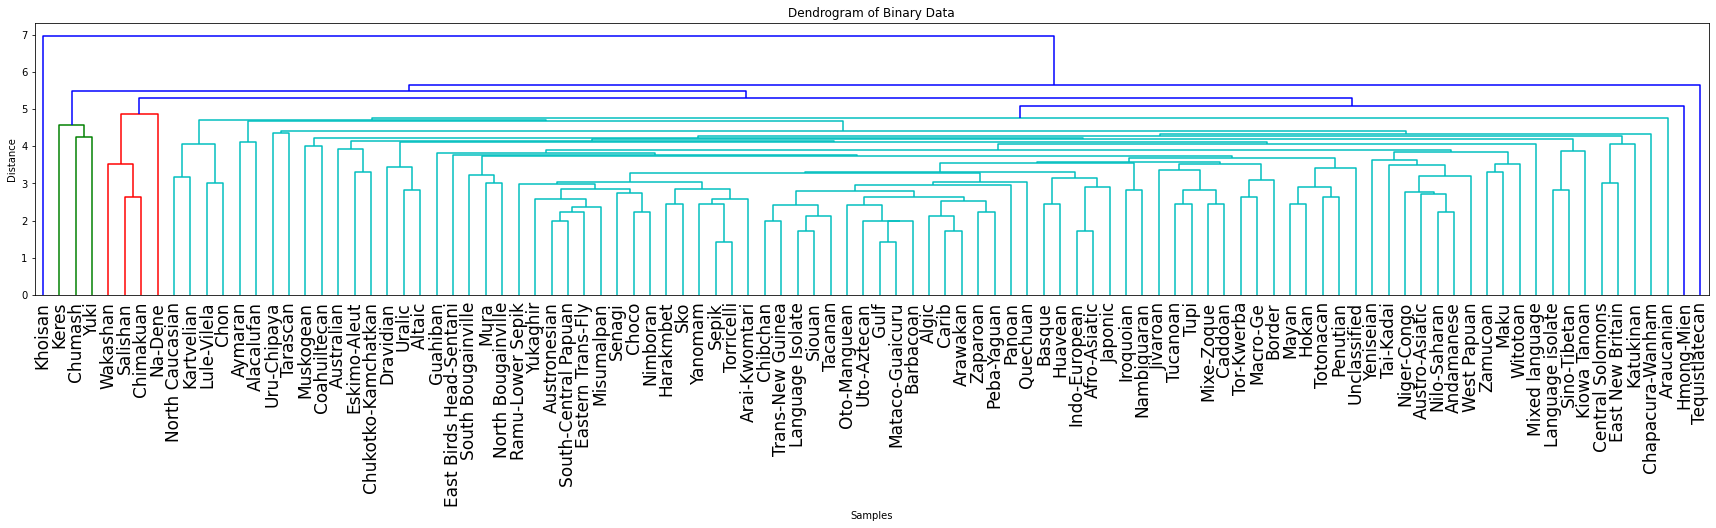

In [23]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

binary_data = groupedTreeData.iloc[:, 1:].values  # Assuming binary data starts from column 1

distance_matrix = hierarchy.distance.pdist(binary_data, metric='euclidean')

Z = hierarchy.linkage(distance_matrix, method='average', optimal_ordering=True)

# Plot dendrogram
plt.figure(figsize=(30, 5))
dn = hierarchy.dendrogram(Z, labels=groupedTreeData.iloc[:, 0].values, leaf_rotation=90)
plt.title('Dendrogram of Binary Data')
plt.xlabel('Samples')
plt.xticks(fontsize=17, rotation=90)
plt.ylabel('Distance')
plt.show()


In [24]:
names = list(hammingDistanceMapToBukaRoot.keys())
clustering = data[data['Name'].isin(names)]
clustering['Distances'] = data['Name'].map(hammingDistanceMapToBukaRoot)

In [32]:
import plotly.express as px
import pandas as pd


# Create scatter map
fig = px.scatter_geo(clustering, lat='Latitude', lon='Longitude', color='Distances',
                     hover_name='Name', #size='mag',
                     title='Clustering by Phoneme Hamming Distance ')
fig.show()

In [27]:
lat_lon_distance = {}
for _, row in clustering.iterrows():
    d = row['Distances']
    if d not in lat_lon_distance:
        lat_lon_distance[d] = []
    lat_lon_distance[d].append((row['Latitude'], row['Longitude']))

In [31]:
import plotly.graph_objects as go

# Create figure
fig = go.Figure()

# Add scattergeo plot for the initial locations
scatter = fig.add_trace(
    go.Scattergeo(
        mode='markers+text',
        textposition='top center',
        marker=dict(
           size=10,
           color='red',
           opacity=0.7,
        ),
        name='Cities'
    )
)

# Set initial layout properties
fig.update_layout(
    title='Spread of Languages by Phoneme',
    geo=dict(
        scope='world',
        showland=True,
    )
)

# Add frames for animation
frames = []
locations_list = lat_lon_distance.values()


all_locations = []
# distances = []
for i, locations in lat_lon_distance.items():
    # print(i)
    all_locations.extend(locations)
    # distances.append(i)
    frame_data = go.Frame(
        data=[
            go.Scattergeo(
                lon=[loc[1] for loc in all_locations],
                lat=[loc[0] for loc in all_locations],
                mode='markers+text',
                textposition='top center',
                marker=dict(
                    size=5,
                    color=i,  # Assign color based on distances
                    colorscale='Viridis', 
                    opacity=0.7,
                )
            )
        ],
    )
    frames.append(frame_data)

# Add frames to the figure
fig.frames = frames

# Update animation settings
fig.update_layout(
    updatemenus=[
        {
            "buttons": [
                {
                    "args": [None, {"frame": {"duration": 5000, "redraw": True}, "fromcurrent": True, "mode": "immediate"}],
                    "label": "Play",
                    "method": "animate"
                },
                {
                    "args": [[None], {"frame": {"duration": 0, "redraw": False}, "mode": "immediate"}],
                    "label": "Pause",
                    "method": "animate"
                }
            ],
            "direction": "left",
            "pad": {"r": 10, "t": 87},
            "showactive": False,
            "type": "buttons",
            "x": 0.1,
            "xanchor": "right",
            "y": 0,
            "yanchor": "top"
        }
    ]
)

# Show the plot
fig.show()

### Hashing Distance

In [ ]:
import hashlib

def hashBinaryList(binaryList):
    # Convert the binary list to bytes
    binaryBytes = bytes(binaryList)
    
    # Hash the bytes using SHA-256
    hashObject = hashlib.sha256(binaryBytes)
    
    # Get the hexadecimal representation of the hash
    hashHex = hashObject.hexdigest()
    
    return hashHex


In [ ]:
def hashDistance(hash1, hash2):
    distance = 0
    for char1, char2 in zip(hash1, hash2):
        # Convert hexadecimal characters to integers and calculate the absolute difference
        distance += abs(int(char1, 16) - int(char2, 16))
    
    return distance

In [ ]:
#Use Sha-256 and hash every phoneme list. calculate "distance" by absolute value
# subtraction between value and Buka root. order from most similar to least similar
#map the language to tuple (latitude, longitude)

bukaRow = data.loc[data['Name'] == "Buka"]
bukaRow = bukaRow.iloc[:, 9:]
#A list of the phoneme values
bukaRowList = list(bukaRow.values[0])
bukaHash = hashBinaryList(bukaRowList)

hashingDistanceMapToBukaRoot = {}


48dfca9d14d14fa2e9851ee2937b2783869ce686cd4b5bf642f7c50156a1da20


In [ ]:
#Map the distances to language
for index, row in data.iterrows():
    #We actually want to include the base root in this map because it'll have 
    #perfect score and be our first value (root)

    languageName = row['Name']
    languagePhonemes = row.iloc[9:]
    languagePhonemesList = list(languagePhonemes.values)
    languageHash = hashBinaryList(languagePhonemesList)
    hashingDistance = hashDistance(bukaHash, languageHash)
    #print(f"Hashing Distance between lists: {hashingDistance}")

    hashingDistanceMapToBukaRoot[languageName] = hashingDistance


In [ ]:
print(hashingDistanceMapToBukaRoot)

{'Hadza': 339, 'Sandawe': 336, 'Qxu^': 324, 'Nama': 364, '!Ora': 293, 'G//abake': 346, 'Shua': 302, 'Danisin': 335, 'Deti': 368, 'Kxoe': 349, 'Buka': 0, 'Handa': 0, 'Xu^': 326, 'G//ana': 318, 'G/wi': 374, 'Naron': 391, '\\u450?Hu^': 390, 'N/amani': 282, 'N/huki': 375, 'Katcha': 317, 'Katla': 343, 'Ko': 346, 'Warnang': 348, 'Rere': 372, 'Utoro': 303, 'Logol': 340, 'Ebang': 317, 'Laru': 317, 'Shirumba': 365, 'Tiro': 393, 'Moro': 352, 'Tegem': 267, 'Nding': 245, 'Jomang': 375, 'Tocho': 349, 'Ngile': 365, 'Dengebu': 319, 'Tegali': 285, 'Soninke': 344, 'Susu': 279, 'Vai': 340, 'Mandinka': 346, 'Maninka': 348, 'Bambara': 350, 'Dyula': 391, 'Loko\\sub 1\\nosupersub': 379, 'Loma': 331, 'Kpelle': 323, 'Mende': 294, 'Dan': 353, 'Kweni': 329, 'Tura': 391, 'Bisa': 345, 'Sane': 296, 'San': 346, 'Fula': 326, 'Wolof': 314, 'Balant': 322, 'Ganja': 357, 'Mankan': 317, 'Manjaku': 297, 'Diola': 394, 'Badyara': 340, 'Banyun': 316, 'Basari': 369, 'Bedik': 331, 'Temne': 356, 'Southern Bullom': 365, 'Seme': 

In [ ]:
#Store the languages and locations
languageLocations = {}
for index, row in data.iterrows():
    latitude = row["Latitude"]
    longitude = row["Longitude"]
    languageName = row["Name"]
    languageLocations[languageName] = (latitude, longitude)
    #print(index)

# Sort the hashingDistanceMapToBukaRoot dictionary by values (scores)
sortedLanguages = sorted(hashingDistanceMapToBukaRoot, key=lambda x: hashingDistanceMapToBukaRoot[x])

In [ ]:
#print(sortedLanguages)

['Buka', 'Handa', 'Guanano', 'Alyutor', 'Nding', 'Pawaian', 'Axvax', 'Canela', 'Rengao', 'Urii', 'Beami', 'Hupda', 'Blackfoot', 'Saisiyat', 'Ebrie', 'Ngarla', 'Nyamal', 'Nyiyabali', 'Kohumono', 'Khorchin', 'Tegem', 'Tequistlatec', 'Ata', 'Assyrian', 'East Cham', 'Gurma', 'Ingrian', 'Sau', 'Lamba\\sub 1\\nosupersub', 'Kambot', 'Kalamianen', 'Toabaita', 'Choctaw', 'Ninam', 'Ossetic', 'Ordos', 'Koraga', 'Jicaque', 'Pemon', 'Susu', 'Ingush', 'Halia', 'Seneca', 'Andoa', 'Baule', 'Macedonian', 'Sundanese', 'Maskelynes', 'Taikat', 'Thawa', 'Dharawal', 'Yazgulami', 'Livonian', 'Siane', 'Puelche', 'N/amani', 'Degema', 'Armenian', 'Limbu', 'Tao', 'Tumak', 'Lithuanian', 'Dehu', 'Humene', 'Yuchi', 'Ngbaka', 'North Kankanay', 'Tegali', 'Iyekhee', 'Koch', 'Alamblak', 'Dye', 'Buem', 'Norwegian', 'English', 'Tsou', 'Tarascan', 'Cayapa', 'Igede', 'Faroese', 'Lenakel', 'Anaguta', 'Nyoro', 'Shilha', 'Ibanag', 'A-Pucikwar', 'Abua', 'Rundi', 'Irish', 'Riang', 'Manggarai', 'Nomad', 'Duna', 'Yahang', 'Maung'

In [ ]:
# Group languages by their scores
groupedLanguages = {}
for lang in sortedLanguages:
    score = hashingDistanceMapToBukaRoot[lang]
    if score in groupedLanguages:
        groupedLanguages[score].append(lang)
    else:
        groupedLanguages[score] = [lang]

# Create a 2D list where each sublist contains languages with the same score
orderedLanguageLocations = []
for score in sorted(groupedLanguages.keys()):
    orderedLanguageLocations.append([(lang, languageLocations[lang]) for lang in groupedLanguages[score]])



In [ ]:
#This shows the scores mapped to the languages, sorted
#print(groupedLanguages)

{0: ['Buka', 'Handa'], 242: ['Guanano'], 243: ['Alyutor'], 245: ['Nding'], 250: ['Pawaian'], 252: ['Axvax'], 253: ['Canela'], 254: ['Rengao', 'Urii'], 255: ['Beami'], 257: ['Hupda'], 258: ['Blackfoot'], 263: ['Saisiyat'], 264: ['Ebrie', 'Ngarla', 'Nyamal', 'Nyiyabali'], 266: ['Kohumono', 'Khorchin'], 267: ['Tegem', 'Tequistlatec'], 268: ['Ata'], 269: ['Assyrian', 'East Cham'], 270: ['Gurma'], 271: ['Ingrian', 'Sau'], 272: ['Lamba\\sub 1\\nosupersub', 'Kambot'], 273: ['Kalamianen', 'Toabaita'], 274: ['Choctaw', 'Ninam'], 275: ['Ossetic'], 276: ['Ordos'], 277: ['Koraga', 'Jicaque', 'Pemon'], 279: ['Susu', 'Ingush', 'Halia', 'Seneca', 'Andoa'], 280: ['Baule', 'Macedonian', 'Sundanese', 'Maskelynes', 'Taikat', 'Thawa', 'Dharawal'], 281: ['Yazgulami', 'Livonian', 'Siane', 'Puelche'], 282: ['N/amani', 'Degema', 'Armenian', 'Limbu', 'Tao'], 283: ['Tumak', 'Lithuanian', 'Dehu', 'Humene', 'Yuchi'], 284: ['Ngbaka', 'North Kankanay'], 285: ['Tegali', 'Iyekhee', 'Koch', 'Alamblak'], 286: ['Dye', '

In [ ]:

#print(orderedLanguageLocations)

[[('Buka', (-17.9914, 22.80561)), ('Handa', (-19.06392, 22.96317))], [('Guanano', (1.03875, -69.70265))], [('Alyutor', (60.39587, 165.59234))], [('Nding', (10.27415, 30.73055))], [('Pawaian', (-6.89436, 145.10565))], [('Axvax', (42.38476, 46.32616))], [('Canela', (-7.98641, -47.54969))], [('Rengao', (14.60799, 107.83564)), ('Urii', (-6.43813, 146.62277))], [('Beami', (-6.14241, 142.47135))], [('Hupda', (0.46252, -69.98387))], [('Blackfoot', (48.68407, -112.8932))], [('Saisiyat', (24.60631, 121.06666))], [('Ebrie', (5.37739, -4.07237)), ('Ngarla', (-20.21088, 119.31037)), ('Nyamal', (-20.97041, 119.80535)), ('Nyiyabali', (-22.7643, 120.69634))], [('Kohumono', (5.94546, 8.02042)), ('Khorchin', (42.87819, 113.05973))], [('Tegem', (10.17372, 30.73855)), ('Tequistlatec', (16.22416, -95.75971))], [('Ata', (9.715, 122.9))], [('Assyrian', (36.5199, 40.75754)), ('East Cham', (11.31566, 108.5656))], [('Gurma', (10.7731, 0.56891))], [('Ingrian', (59.46977, 29.58611)), ('Sau', (-6.68161, 143.96474

## Visualization 

In [ ]:
import plotly.graph_objects as go

# Create figure
fig = go.Figure()

# Add scattergeo plot for the initial locations
scatter = fig.add_trace(
    go.Scattergeo(
        mode='markers+text',
        textposition='top center',
        #marker=dict(
        #    size=10,
        #    color='blue',
        #    opacity=0.7,
        #),
        name='Cities'
    )
)

# Set initial layout properties
fig.update_layout(
    title='Spread of Languages by Phoneme',
    geo=dict(
        scope='world',
        showland=True,
    )
)

# Add frames for animation
frames = []
locations_list = [
    [(40.7128, -74.0060), (51.5074, -0.1278), (-33.8688, 151.2093)],  # Example locations for 1952
    [(37.7749, -122.4194), (48.8566, 2.3522), (-37.8136, 144.9631)],  # Example locations for 1953
    [(34.0522, -118.2437), (55.7558, 37.6176), (35.6895, 139.6917)]   # Example locations for 1954
]


all_locations = []
for i, locations in enumerate(locations_list):
    all_locations.extend(locations)
    frame_data = go.Frame(
        data=[
            go.Scattergeo(
                lon=[loc[1] for loc in all_locations],
                lat=[loc[0] for loc in all_locations],
                mode='markers+text',
                textposition='top center',
                marker=dict(
                    size=10,
                    color='blue',
                    opacity=0.7,
                )
            )
        ],
    )
    frames.append(frame_data)

# Add frames to the figure
fig.frames = frames

# Update animation settings
fig.update_layout(
    updatemenus=[
        {
            "buttons": [
                {
                    "args": [None, {"frame": {"duration": 1000, "redraw": True}, "fromcurrent": True, "mode": "immediate"}],
                    "label": "Play",
                    "method": "animate"
                },
                {
                    "args": [[None], {"frame": {"duration": 0, "redraw": False}, "mode": "immediate"}],
                    "label": "Pause",
                    "method": "animate"
                }
            ],
            "direction": "left",
            "pad": {"r": 10, "t": 87},
            "showactive": False,
            "type": "buttons",
            "x": 0.1,
            "xanchor": "right",
            "y": 0,
            "yanchor": "top"
        }
    ]
)

# Show the plot
fig.show()


## Clustering Analysis

In [ ]:
unique_values_count = data['Language Classification'].nunique()

print("Number of unique values in the 'ICO' column:", unique_values_count)

Number of unique values in the 'ICO' column: 102


In [ ]:
treeData = data

# Now let's find the majority value for each Language Classification
def majority_value(group):
    phoneme_cols = [col for col in group.columns if col.startswith('Phoneme')]
    majority_row = {}
    for col in phoneme_cols:
        value_counts = group[col].value_counts()
        #print(value_counts)
        # Get the value with the highest count
        majority_value = value_counts.idxmax()
        #print(majority_value)
        # Store the majority value for the column
        majority_row[col] = majority_value
    return pd.Series(majority_row)

# Group by Language Classification and apply the majority_value function
groupedTreeData = treeData.groupby('Language Classification').apply(majority_value).reset_index()

print(groupedTreeData)

    Language Classification  Phoneme 0  Phoneme 1  Phoneme 2  Phoneme 3  \
0              Afro-Asiatic          0          0          0          0   
1                Alacalufan          0          0          0          0   
2                     Algic          0          0          0          0   
3                    Altaic          0          0          0          0   
4                Andamanese          0          0          0          0   
..                      ...        ...        ...        ...        ...   
97                Yeniseian          0          0          0          0   
98                 Yukaghir          0          0          0          0   
99                     Yuki          0          0          0          0   
100                Zamucoan          0          0          0          0   
101                Zaparoan          0          0          0          0   

     Phoneme 4  Phoneme 5  Phoneme 6  Phoneme 7  Phoneme 8  ...  Phoneme 718  \
0            0     

In [ ]:
#result.head()
if (groupedTreeData.iloc[5] == 1).any():
    print("At least one value in the row is equal to 1.")
else:
    print("No value in the row is equal to 1.")

At least one value in the row is equal to 1.


In [ ]:
groupedTreeData.shape

(102, 729)

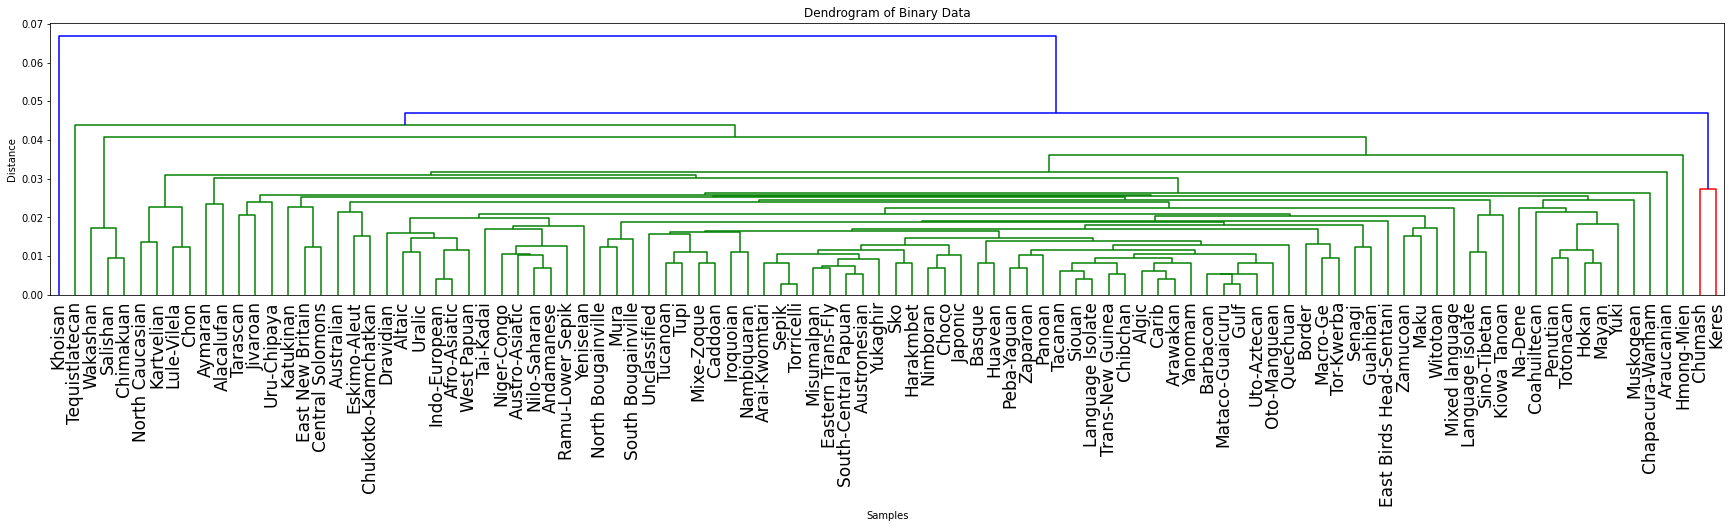

In [ ]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

binary_data = groupedTreeData.iloc[:, 1:].values  # Assuming binary data starts from column 1

distance_matrix = hierarchy.distance.pdist(binary_data, metric='hamming')

Z = hierarchy.linkage(distance_matrix, method='average', optimal_ordering=True)

# Plot dendrogram
plt.figure(figsize=(30, 5))
dn = hierarchy.dendrogram(Z, labels=groupedTreeData.iloc[:, 0].values, leaf_rotation=90)
plt.title('Dendrogram of Binary Data')
plt.xlabel('Samples')
plt.xticks(fontsize=17, rotation=90)
plt.ylabel('Distance')
plt.show()
